<a href="https://www.kaggle.com/viacheslavkhovrov/sentiment-analysis-on-food-reviews?scriptVersionId=88418835" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [41]:
import numpy as np
import pandas as pd
# read the dataframe
df = pd.read_csv("../input/amazon-fine-food-reviews/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [43]:
# check for number of null values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [44]:
# remove rows with null values
df.dropna(subset=['Summary'], inplace=True)
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

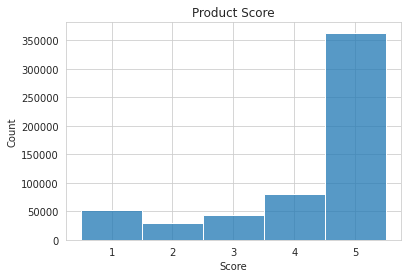

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot a histogram of Scores by count
sns.set_style('whitegrid')
sns.histplot(data=df, x='Score', discrete=True)
plt.title('Product Score')
plt.show()

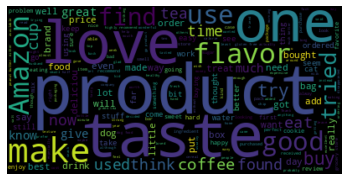

In [46]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
# assign reviews with Score > 3 as positive sentiment
# Score < 3 as negative sentiment
# remove Score = 3

df = df[df['Score'] != 3]
df['Sentiment'] = df['Score'].apply(lambda score: 1 if score > 3 else -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [48]:
# split the dataframe
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == -1]

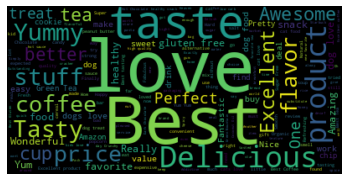

In [49]:
stopwords = set(STOPWORDS)
# remove 'good' and 'great' since they are in negative reviews
stopwords.update(["br", "href","good","great"])

positive_summary = " ".join(review for review in positive.Summary)
positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_summary)

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

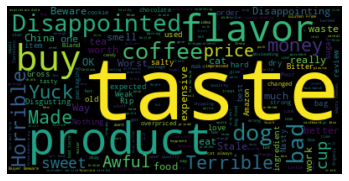

In [50]:
negative_summary = " ".join(review for review in negative.Summary)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_summary)

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

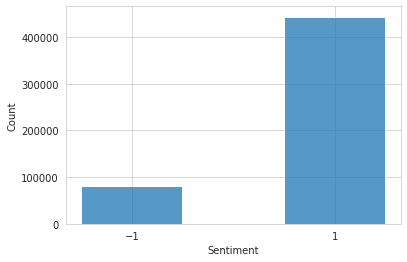

In [51]:
sns.histplot(data=df, x='Sentiment', discrete=True)
plt.xticks([-1, 1])
plt.show()

In [52]:
# remove punctuation from Summary and Text
def remove_punctuation(text):
    return "".join(c for c in text if c not in ("?", ".", ";", ":",  "!",'"'))

df['Summary'] = df['Summary'].apply(remove_punctuation)

In [53]:
# split the train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [54]:
# convert the text into a bag-of-words model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [55]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

X_train = train_matrix 
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [56]:
# fit the model on data and predict
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [57]:
# testing
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(predictions, y_test)

array([[11644,  2282],
       [ 5851, 91629]])

In [58]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

          -1       0.67      0.84      0.74     13926
           1       0.98      0.94      0.96     97480

    accuracy                           0.93    111406
   macro avg       0.82      0.89      0.85    111406
weighted avg       0.94      0.93      0.93    111406

